In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
sheet_id = '11JOsWmEO6UDUH24NnLCTUu1EpAl_vXySDh6kjeZvKVg'
sheet_gid = '0'

url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_gid}'

In [15]:
try:
    df = pd.read_csv('./data/dataset_wawancara.csv', header=3)
    print("Berhasil membaca data terbaru dari Google Sheet!")
except Exception as e:
    print("\n[ERROR] Gagal membaca Google Sheet.")

Berhasil membaca data terbaru dari Google Sheet!


In [16]:
df.rename(columns={
    df.columns[1]: 'Date',
    df.columns[2]: 'Time'
}, inplace=True)

In [17]:
cols_to_keep = ['Date', 'Time'] + list(df.columns[4:])
df_clean = df[cols_to_keep].copy()
df_clean['Date'] = df_clean['Date'].ffill()

In [18]:
df_melted = df_clean.melt(
    id_vars=['Date', 'Time'], 
    var_name='Division', 
    value_name='Candidate_Name'
)

In [19]:
df_melted = df_melted.dropna(subset=['Candidate_Name'])
exclude_keywords = ['CORE TEAM UNAVAILABLE', '-', 'unnamed', 'nan']
df_final = df_melted[~df_melted['Candidate_Name'].astype(str).str.contains('|'.join(exclude_keywords), case=False, na=False)]

df_final['Division'] = df_final['Division'].str.strip()

tech_divisions = [
    'FRONT-END DEVELOPMENT', 'BACK-END DEVELOPMENT', 'MOBILE DEVELOPMENT', 
    'GAME DEVELOPMENT', 'UI/UX', 'CYBER SECURITY', 'MACHINE LEARNING'
]

C:\Users\aril\AppData\Local\Temp\ipykernel_14320\3671827788.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Division'] = df_final['Division'].str.strip()


In [20]:
def categorize_division(div):
    if div in tech_divisions:
        return 'Curriculum (Tech)'
    else:
        return 'Non-Curriculum (Non-Tech)'

df_final['Category'] = df_final['Division'].apply(categorize_division)

print(f"Data berhasil diproses! Ditemukan {len(df_final)} jadwal wawancara valid.")
print("-" * 30)

Data berhasil diproses! Ditemukan 263 jadwal wawancara valid.
------------------------------


C:\Users\aril\AppData\Local\Temp\ipykernel_14320\1168606074.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Category'] = df_final['Division'].apply(categorize_division)


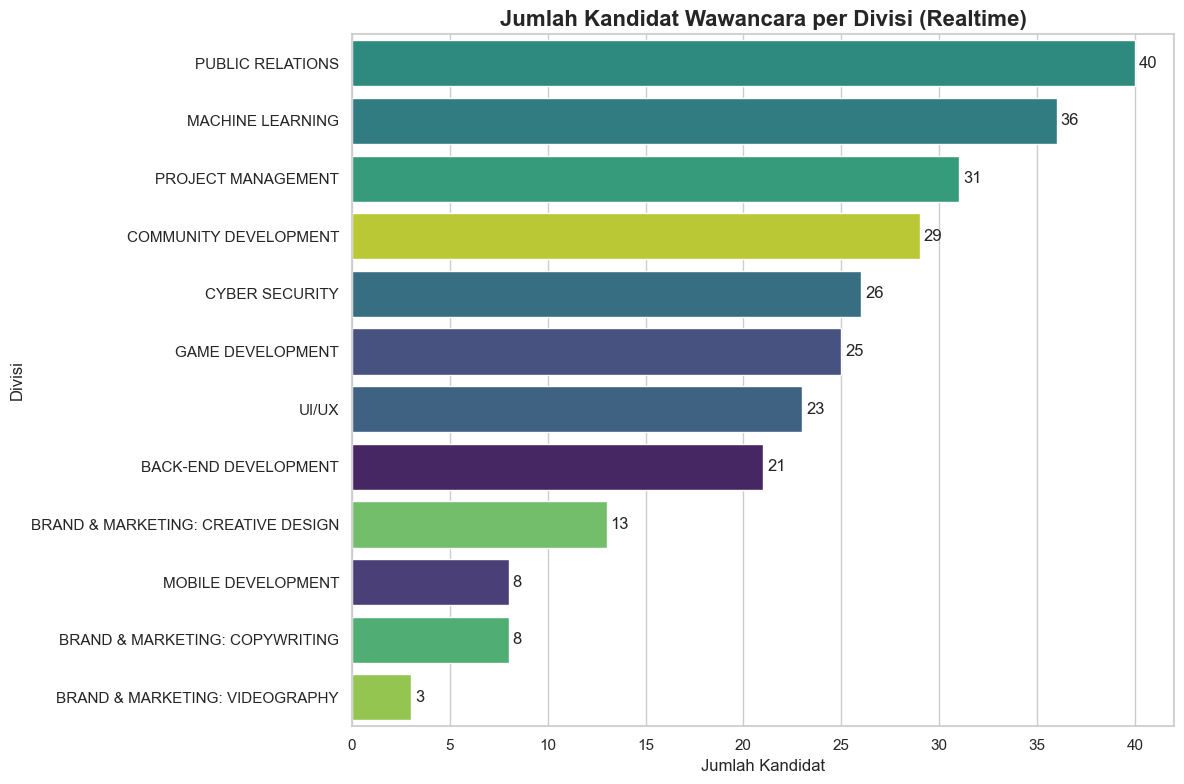

In [21]:
sns.set_theme(style="whitegrid")

# Figure 1: Jumlah Kandidat per Divisi
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    data=df_final, 
    y='Division', 
    order=df_final['Division'].value_counts().index,
    palette='viridis',
    hue='Division',
    legend=False
)
plt.title('Jumlah Kandidat Wawancara per Divisi (Realtime)', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Kandidat')
plt.ylabel('Divisi')
for container in ax.containers:
    ax.bar_label(container, padding=3)
plt.tight_layout()
plt.show()

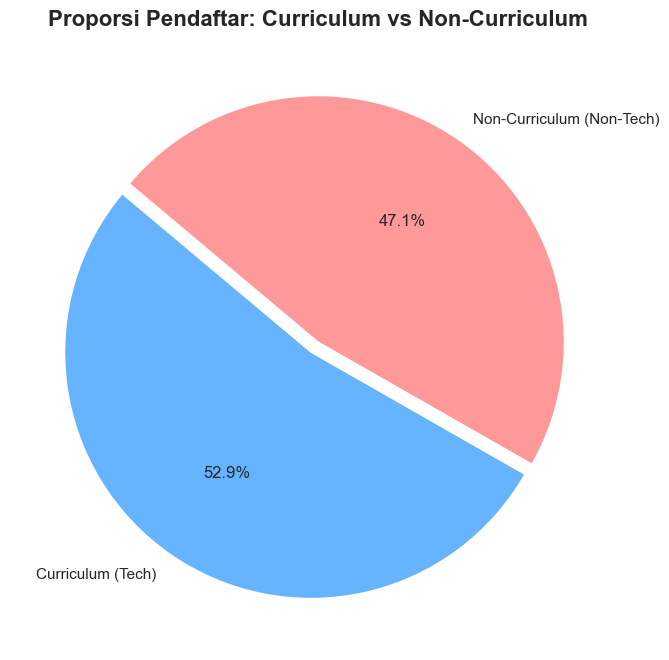

In [22]:
# Figure 2: Pie Chart Kategori (Tech vs Non-Tech)
plt.figure(figsize=(8, 8))
category_counts = df_final['Category'].value_counts()
plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#66b3ff', '#ff9999'],
    explode=(0.05, 0)
)
plt.title('Proporsi Pendaftar: Curriculum vs Non-Curriculum', fontsize=16, fontweight='bold')
plt.show()

C:\Users\aril\AppData\Local\Temp\ipykernel_14320\1193740483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Hour_Block'] = df_final['Time'].astype(str).str.split('.').str[0]


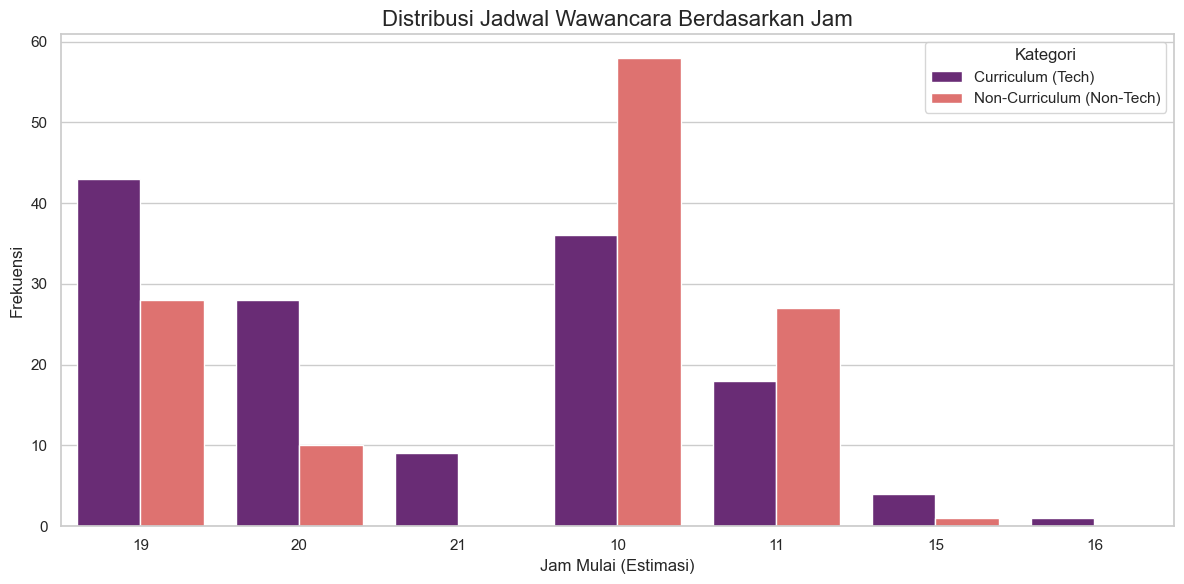

In [23]:
# Figure 3: Heatmap Kesibukan Waktu Wawancara
try:
    # Mengambil jam saja (misal "10.00-10.15" diambil "10")
    df_final['Hour_Block'] = df_final['Time'].astype(str).str.split('.').str[0]
    
    plt.figure(figsize=(12, 6))
    sns.countplot(
        data=df_final, 
        x='Hour_Block', 
        hue='Category', 
        palette='magma'
    )
    plt.title('Distribusi Jadwal Wawancara Berdasarkan Jam', fontsize=16)
    plt.xlabel('Jam Mulai (Estimasi)')
    plt.ylabel('Frekuensi')
    plt.legend(title='Kategori')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Tidak dapat membuat grafik waktu karena format waktu tidak seragam.")